### IMPORT LIBRARIES

In [22]:
import requests
import matplotlib.pyplot as plt
import pandas as pd
import rasterio
from rasterio.mask import mask
import shapely.geometry as geo
import plotly.graph_objects as go
import numpy as np


### WELCOME TO 3D HOUSE PROJECT

In [2]:
print('Welcome to 3D House Modelling Project \nPlease enter your adress!')


Welcome to 3D House Modelling Project 
Please enter your adress!


In [101]:
def get_adress():
    street_name = input('Enter your street name: ')
    house_number = int(input('Enter your house number: '))
    post_code = int(input('Enter your post code: '))
    
    adress ={'straatnaam':street_name ,
             'huisnummer':house_number , 
             'postcode': post_code}
    return adress

### REQUEST THE INFORMATION OF X, Y and POLYGON VALUES WITH API
[API](https://docs.basisregisters.vlaanderen.be/docs/api-documentation.html#section/Technische-Info/Foutmeldingen)

In [113]:
def get_coordinate():
    adress = get_adress()
    response_API = requests.get('https://api.basisregisters.vlaanderen.be/v1/adresmatch', adress).json()


    coordinates = response_API['adresMatches'][0]['adresPositie']['point']['coordinates']
    x_coordinate = coordinates[0]
    y_coordinate = coordinates[1]

    gebouweenheden = requests.get(response_API['adresMatches'][0]['adresseerbareObjecten'][0]['detail']).json()
    gebouw = requests.get(gebouweenheden['gebouw']['detail']).json()
    polygon_list = gebouw['geometriePolygoon']['polygon']['coordinates'][0]

    print("X coordinate is ", x_coordinate)
    print("Y coordinate is ", y_coordinate)
    return polygon_list

In [124]:
x_coordinate

148689.43

### GET POLYGON VALUES

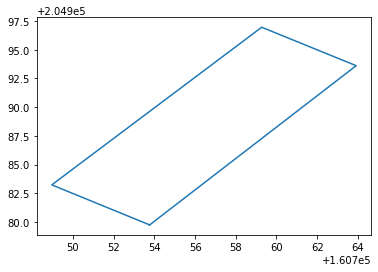

In [47]:
#Create lists of x and y values of the polygon
x_pol, y_pol = zip(*polygon_list)

#Plot the shape of the polygon to see what we can expect as the shape of the house
plt.figure()
plt.plot(x_pol,y_pol) 
plt.show()


### GET POLYGON

In [115]:
def get_polygon():
    poly = geo.Polygon(get_coordinate())
    return poly

Enter your street name: Berkenrodelei 
Enter your house number: 28
Enter your post code: 2660
X coordinate is  148689.43
Y coordinate is  207610.79


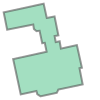

In [116]:
get_polygon()

### READ .CSV

In [120]:
def read_csv(url: str):
    get_polygon()
    df = pd.read_csv(url) 
    
    bound_file = df[(df['Left Bound'] < x_coordinate) & (df['Right Bound'] > x_coordinate)
                 & ((df['Bottom Bound'] < y_coordinate) & (df['Top Bound'] > y_coordinate))]
    
    file_number = bound_file['File Number'].iloc[0]

    url_DSM = bound_file['Url DSM'].iloc[0]
    url_DTM = bound_file['Url DTM'].iloc[0]
    return file_number

In [125]:
read_csv('list_of_bounds.csv')

Enter your street name: Botestraat
Enter your house number: 23
Enter your post code: 9032
X coordinate is  103765.15
Y coordinate is  197618.24


15

In [126]:
x_coordinate

148689.43

### FINDING CORRECT FILE NUMBER

In [122]:
#finding the file number

bound_file = df[(df['Left Bound'] < x_coordinate) & (df['Right Bound'] > x_coordinate)
             & ((df['Bottom Bound'] < y_coordinate) & (df['Top Bound'] > y_coordinate))]
    
file_number = bound_file['File Number'].iloc[0]

url_DSM = bound_file['Url DSM'].iloc[0]
url_DTM = bound_file['Url DTM'].iloc[0]
bound_file

,File Number,Left Bound,Right Bound,Top Bound,Bottom Bound,Url DSM,Url DTM
14,15,130000.0,162000.0,218000.0,198000.0,zip+https://downloadagiv.blob.core.windows.net...,zip+https://downloadagiv.blob.core.windows.net...


### MASKING

#### DSM MASKING

In [55]:
with rasterio.open(url_DSM) as data:
    out_dsm, out_transform_dsm = mask(data,[poly],crop= True,nodata=None,filled=True, indexes =1 )

#### DTM MASKING

In [58]:
with rasterio.open(url_DTM) as data_dtm:
    out_dtm, out_transform_dtm = mask(data_dtm,[poly],crop= True,nodata=None,filled=True, indexes =1 )

### CHM

In [16]:
CHM = out_dsm - out_dtm

In [59]:
CHM_Provinciesteenweg = out_dsm - out_dtm

### 3D AXES

In [98]:
fig = go.Figure(data=go.Surface (z= CHM_Provinciesteenweg , opacity=0.8, colorscale='geyser'))
                  

fig.update_layout(scene = dict(
                    xaxis_title='X AXIS TITLE',
                    yaxis_title='Y AXIS TITLE',
                    zaxis_title='Z AXIS TITLE'),
                    width=700,
                    height = 700
                  )

fig.show()


In [56]:
fig = go.Figure(data=go.Surface (z= CHM, opacity=0.8, colorscale='agsunset'))
                  

fig.update_layout(scene = dict(
                    xaxis_title='X AXIS TITLE',
                    yaxis_title='Y AXIS TITLE',
                    zaxis_title='Z AXIS TITLE'),
                    width=700,
                    margin=dict(r=30, b=10, l=30, t=10))

fig.show()


In [ ]:
 colors = ['aggrnyl', 'agsunset', 'algae', 'amp', 'armyrose', 'balance',
             'blackbody', 'bluered', 'blues', 'blugrn', 'bluyl', 'brbg',
             'brwnyl', 'bugn', 'bupu', 'burg', 'burgyl', 'cividis', 'curl',
             'darkmint', 'deep', 'delta', 'dense', 'earth', 'edge', 'electric',
             'emrld', 'fall', 'geyser', 'gnbu', 'gray', 'greens', 'greys',
             'haline', 'hot', 'hsv', 'ice', 'icefire', 'inferno', 'jet',
             'magenta', 'magma', 'matter', 'mint', 'mrybm', 'mygbm', 'oranges',
             'orrd', 'oryel', 'oxy', 'peach', 'phase', 'picnic', 'pinkyl',
             'piyg', 'plasma', 'plotly3', 'portland', 'prgn', 'pubu', 'pubugn',
             'puor', 'purd', 'purp', 'purples', 'purpor', 'rainbow', 'rdbu',
             'rdgy', 'rdpu', 'rdylbu', 'rdylgn', 'redor', 'reds', 'solar',
             'spectral', 'speed', 'sunset', 'sunsetdark', 'teal', 'tealgrn',
             'tealrose', 'tempo', 'temps', 'thermal', 'tropic', 'turbid',
             'turbo', 'twilight', 'viridis', 'ylgn', 'ylgnbu', 'ylorbr',
             'ylorrd']

In [54]:
CHM.max()

40.39195